<a href="https://colab.research.google.com/github/sfujita0601/Lab_assistance/blob/main/jitter_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
np.random.seed(2018)
df = pd.DataFrame({
    'ERF1': np.random.normal( 6, 2.1, 10),
    'ERF2': np.random.normal(12, 2.2, 10),
    'ERF3': np.random.normal(18, 2.5, 10),
})
print(df)


In [2]:
from google.colab import files
uploaded = files.upload()


Saving testdata.csv to testdata.csv


In [6]:
# アップロードしたエクセルファイルを読み込む
#df = pd.read_excel('/content/240906 GTT.xlsx', sheet_name='Sheet2', header=0)
# csvはこちら
df = pd.read_excel('/content/testdata.csv',  header=0, index_col=0)

# 最初の5行を表示
print(df.head())

# 列名を取得する
Col_name = list(df.columns)
print(Col_name)

# label列だけ抜き出す。もしlabel列を用意してなければエラー表示
if 'label' in Col_name:
  Col_name.remove('label')
else:
  print('label列がありません。')

# labelの数だけ棒グラフを描画する
Label = list(set(df['label']))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# bar chart & error bar
x_position = np.arange(len(Label))
error_bar_set = dict(lw = 1, capthick = 1, capsize = 20)
ax.bar(x_position, df.mean(), yerr=df.std(), tick_label=df.columns, error_kw=error_bar_set)

# jitter plot
df_melt = pd.melt(df)
print(df_melt.head())



# 各群のデータを整形
group_20C = df[df['Group'] == '20C'].iloc[:, 1:].values
group_3C = df[df['Group'] == '3C'].iloc[:, 1:].values
group_C = df[df['Group'] == 'C'].iloc[:, 1:].values



   TCho[mg/dl] label
1       76.800    CN
2       56.743    CN
3       97.978    CN
4       82.039    CN
5       80.070    CN
['TCho[mg/dl]', 'label']


KeyError: 'Group'

In [ ]:
# AUCを計算する関数
def compute_auc(group_data):
    return [trapz(data, time_points) for data in group_data]

# 各群のAUCを個別に計算
auc_20C = compute_auc(group_20C)
auc_3C = compute_auc(group_3C)
auc_C = compute_auc(group_C)

# AUCの平均と標準偏差を計算
mean_auc_20C = np.mean(auc_20C)
std_auc_20C = np.std(auc_20C)

mean_auc_3C = np.mean(auc_3C)
std_auc_3C = np.std(auc_3C)

mean_auc_C = np.mean(auc_C)
std_auc_C = np.std(auc_C)

# 各群のAUCの計算結果を表示
print(f"20C AUCs: {auc_20C}, 平均: {mean_auc_20C}, 標準偏差: {std_auc_20C}")
print(f"3C AUCs: {auc_3C}, 平均: {mean_auc_3C}, 標準偏差: {std_auc_3C}")
print(f"C AUCs: {auc_C}, 平均: {mean_auc_C}, 標準偏差: {std_auc_C}")

20C AUCs: [23730.0, 32107.5, 28147.5, 29730.0, 34590.0, 31395.0, 29092.5], 平均: 29827.5, 標準偏差: 3182.283546673453
3C AUCs: [19200.0, 15007.5, 11557.5, 12802.5, 14130.0, 14347.5, 11287.5], 平均: 14047.5, 標準偏差: 2476.5871534374533
C AUCs: [25702.5, 23122.5, 25582.5, 28290.0, 26055.0, 33225.0, 23730.0], 平均: 26529.64285714286, 標準偏差: 3143.6970468620193


<ipython-input-40-290ef84fdb7c>:3: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  return [trapz(data, time_points) for data in group_data]


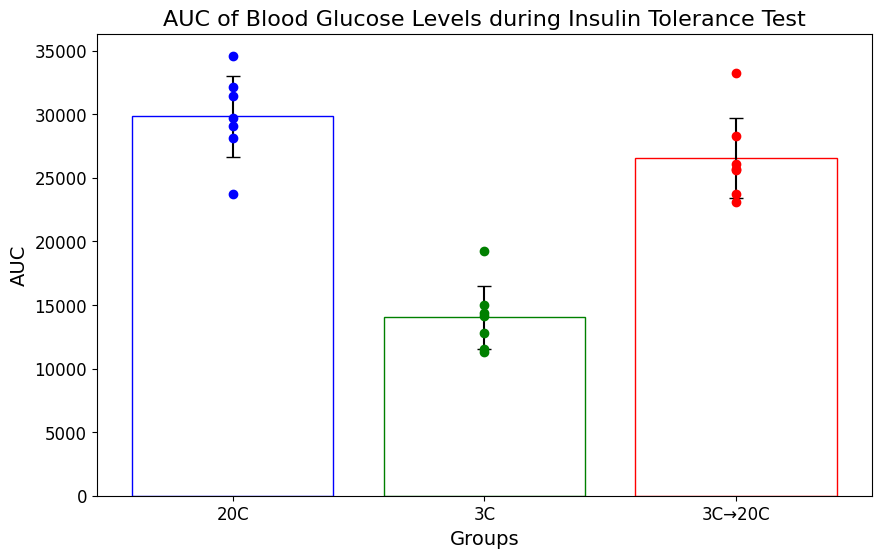

In [ ]:
# 棒グラフにプロットするデータ
means = [mean_auc_20C, mean_auc_3C, mean_auc_C]
std_devs = [std_auc_20C, std_auc_3C, std_auc_C]
groups = ['20C', '3C', '3C→20C']

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

# 棒グラフの作成
plt.bar(groups, means, yerr=std_devs, capsize=5, edgecolor=['blue', 'green', 'red'], facecolor='none')

# 各群のデータ点をプロット（個別データ）
plt.scatter(np.repeat(0, len(auc_20C)), auc_20C, color='blue', label='20C Data', zorder=5)
plt.scatter(np.repeat(1, len(auc_3C)), auc_3C, color='green', label='3C Data', zorder=5)
plt.scatter(np.repeat(2, len(auc_C)), auc_C, color='red', label='C Data', zorder=5)

plt.xlabel('Groups', fontsize=14)  # X軸ラベルのフォントサイズ
plt.ylabel('AUC', fontsize=14)  # Y軸ラベルのフォントサイズ
plt.title('AUC of Blood Glucose Levels during Insulin Tolerance Test', fontsize=16)  # タイトルのフォントサイズ
plt.xticks(fontsize=12)  # X軸の目盛りラベルのフォントサイズ
plt.yticks(fontsize=12)  # Y軸の目盛りラベルのフォントサイズ

# グラフを表示
plt.show()